In [1]:
import sys
sys.path.append("..")

#Introducing the objects
Here we will introduce the different objects involved in the Naming Games models we are using. You can go directly to subsections and execute the code from there, they are independant.

##Vocabulary
First object is the vocabulary. It represents a lexical description of objects. That is to say, associations between $\textit{words}$ and $\textit{meanings}$. Here we consider vocabularies as being matrices filled with 0s or 1s, of size (\#meanings,\#words). The words and meanings are here symbolic, it means they can be refered to only by their respective column (for words) or line (for meanings) number in the matrix.

In [2]:
import lib.ngvoc as ngvoc

We create an object vocabulary, of type sparse (other possible: "matrix", only the way information is stored changes), and size M=5,W=10

In [3]:
voctype="sparse"
M=5
W=10
voctest=ngvoc.Vocabulary(voctype,M,W)

In [4]:
voctest

It is initiated completely empty.

In [5]:
print(voctest)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


###Manipulate the vocabulary
We can then <u>add</u> an association between meaning 3 and word 4 (of value 1). This means that to refer to meaning 3, an agent using this vocabulary would use word 4.

In [6]:
voctest.add(0,1,1)
print(voctest)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


To remove the link, simply add it with value 0.

In [7]:
voctest.add(3,4,0)
print(voctest)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Let's <u>fill</u> the entire matrix with ones

In [8]:
voctest.fill()
print(voctest)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


We can <u>remove homonyms or synonyms</u> of a meaning/word association

In [9]:
voctest.rm_hom(2,2)
print(voctest)

[[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]]


In [10]:
voctest.fill()
voctest.rm_syn(3,4)
print(voctest)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


###Useful functions
Such as finding special subsets of meanings or words, and picking meanings and words among them. First we initialize a random vocabulary, and then apply all the functions.

In [11]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
voctype="sparse"
M=5
W=10
nlink=25

voctest2=ngvoc.Vocabulary(voctype,M,W)
for i in range(0,nlink):
    voctest2.add(random.randint(0,M-1),random.randint(0,W-1),1)
print(voctest2)

[[ 0.  0.  1.  0.  1.  0.  0.  0.  1.  1.]
 [ 1.  1.  1.  0.  0.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]]


Here you can modify the $voctest2$ variable by hand before executing the code:

In [12]:
#voctest2.add(0,0,1)
#voctest2.add(0,0,0)

In [13]:
print("Vocabulary:")
print(voctest2)
print("")

print("Known words:")
print(voctest2.get_known_words())
print("Random known word:")
print(voctest2.get_random_known_w())
print("")
print("Unknown words:")
print(voctest2.get_unknown_words())
print("New unknown word:")
print(voctest2.get_new_unknown_w())
print("")
print("Known meanings:")
print(voctest2.get_known_meanings())
print("Random known meaning:")
print(voctest2.get_random_known_m())

print("")
print("Unknown meanings:")
print(voctest2.get_unknown_meanings())
print("New unknown meaning:")
print(voctest2.get_new_unknown_m())
print("")
print("")
print("Known words for meaning 1:")
print(voctest2.get_known_words(1))
print("Random known word for meaning 1:")
print(voctest2.get_random_known_w(1))
print("")
print("Unknown words for meaning 1:")
print(voctest2.get_unknown_words(1))
print("")
print("Known meanings for word 2:")
print(voctest2.get_known_meanings(2))
print("Random known meaning for word 2:")
print(voctest2.get_random_known_m(2))
print("")
print("Unknown meanings for word 2:")
print(voctest2.get_unknown_meanings(2))


Vocabulary:
[[ 0.  0.  1.  0.  1.  0.  0.  0.  1.  1.]
 [ 1.  1.  1.  0.  0.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]]

Known words:
[0, 1, 2, 3, 4, 6, 7, 8, 9]
Random known word:
4

Unknown words:
[5]
New unknown word:
5

Known meanings:
[0, 1, 2, 3, 4]
Random known meaning:
4

Unknown meanings:
[]
New unknown meaning:
tried to get new m but all are known
2


Known words for meaning 1:
[0, 1, 2, 6, 8, 9]
Random known word for meaning 1:
2

Unknown words for meaning 1:
[3, 4, 5, 7]

Known meanings for word 2:
[0, 1, 2, 4]
Random known meaning for word 2:
0

Unknown meanings for word 2:
[3]


We introduce here a representation of the degree of synonymy/homonymy of the vocabulary. Colors are the same on a line/column. Cold colors indicate high degree of synonymy/homonymy, warm ones low degree.

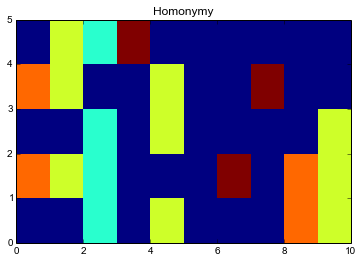

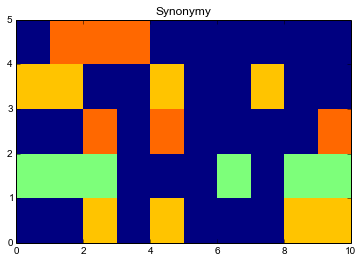

In [14]:
voctest2.visual(vtype="hom")
plt.figure()
voctest2.visual(vtype="syn")

##Strategies
The strategy object describes the behaviour of an agent, given its vocabulary. The main algorithms that vary among strategies are:
* how to choose a link (meaning-word) to enact, 
* how to guess a meaning from a word
* how to update the vocabulary

In [15]:
import lib.ngstrat as ngstrat

Let's create a strategy. We will also need two vocabularies to work on (speaker and hearer). Strategy types will be described in another Notebook.

In [16]:
M=5
W=10

voctype="sparse"
nlink=0

voctest_speaker=ngstrat.Vocabulary(voctype,M,W)
for i in range(0,nlink):
    voctest_speaker.add(random.randint(0,M-1),random.randint(0,W-1),1)
    
voctest_hearer=ngstrat.Vocabulary(voctype,M,W)
for i in range(0,nlink):
    voctest_hearer.add(random.randint(0,M-1),random.randint(0,W-1),1)

print("Speaker:")
print(voctest_speaker)
print(" ")
print("Hearer:")
print(voctest_hearer)

Speaker:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 
Hearer:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [17]:

strat={"strattype":"naivereal"}

teststrat=ngstrat.Strategy(strat)
teststrat

Now that we have a strategy, we can test the different functions. Exec

!! Vocabularies are modified, but this way you can observe progressive growth of the number of links !!

In [18]:
memory=teststrat.init_memory(voctest) #Not important for the naive strategy, here it simply is {}


print("Initial vocabulary of the speaker:")
print(voctest_speaker)
print(" ")
print("Initial vocabulary of the hearer:")
print(voctest_hearer)
print(" ")

mw=teststrat.pick_mw(voctest_speaker,memory)
ms=mw[0]
print("Meaning chosen by speaker:")
print(ms)
print (" ")

w=mw[1]
print("Word uttered by speaker:")
print(w)
print (" ")

mh=teststrat.guess_m(w,voctest_hearer,memory)
print("Meaning interpreted by hearer:")
print(mh)
print (" ")

if (ms==mh):
    print("Success!")
else:
    print("Failure!")
print(" ")

teststrat.update_speaker(ms,w,mh,voctest_speaker,memory)
teststrat.update_hearer(ms,w,mh,voctest_hearer,memory)

print("Updated vocabulary of the speaker:")
print(voctest_speaker)
print(" ")
print("Updated vocabulary of the hearer:")
print(voctest_hearer)

Initial vocabulary of the speaker:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 
Initial vocabulary of the hearer:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 
Meaning chosen by speaker:
3
 
Word uttered by speaker:
9
 
Meaning interpreted by hearer:
3
 
Success!
 
Updated vocabulary of the speaker:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 
Updated vocabulary of the hearer:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0



Here you can modify by hand the 2 vocabularies before re-executing the code:

In [19]:
#voctest_speaker.add(0,0,1)
#voctest_speaker.add(0,0,0)

#voctest_hearer.add(0,0,1)
#voctest_hearer.add(0,0,0)

print("Speaker:")
print(voctest_speaker)
print(" ")
print("Hearer:")
print(voctest_hearer)

Speaker:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 
Hearer:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Appromximation of the probability density of the different procedures of the strategy:

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


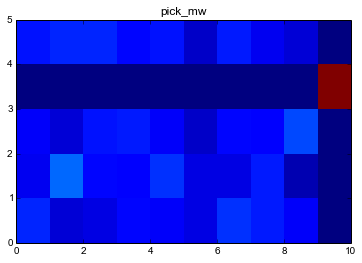

In [24]:
voctest_speaker.visual()
teststrat.visual(voc=voctest_speaker,vtype="pick_mw",iter=500)

##Agents
Agents are objects having a strategy, a vocabulary, and an ID (this last attribute is not important for the moment).

In [19]:
import lib.ngagent as ngagent

Let's create an agent. Vocabulary and strategy are created at the same time.

In [20]:
M=5
W=10
voctype="sparse"
strat={"strattype":"naivereal"}
id_ag="test"

testagent=ngagent.Agent(voctype,strat,id_ag,M,W)
testagent

In [21]:
print(testagent)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


##Populations

In [31]:
import lib.ngagent as ngagent

Let's create a population. Agent creation is here dealt with automatically.

In [32]:
M=5
W=10
voctype="sparse"
strat={"strattype":"naivereal"}
nb_ag=4

testpop=ngagent.Population(voctype,strat,nb_ag,M,W)
testpop

In [33]:
print(testpop)
print("")
print(testpop.repr("all"))

nbagent: 4
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Agent ID: 0
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Agent ID: 1
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Agent ID: 2
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Agent ID: 3
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.

In [34]:
testpop.play_game(10)

In [35]:
print(testpop)
print("")
print(testpop.repr("all"))

nbagent: 4
[[ 0.    0.    0.    0.    0.    0.    0.    0.75  0.    0.  ]
 [ 0.5   0.    0.    0.    0.75  0.    0.    0.    0.    0.  ]
 [ 0.    0.5   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.75  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.5   0.    0.    0.    0.  ]]

Agent ID: 0
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Agent ID: 1
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]
Agent ID: 2
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0

## Experiments

In [26]:
import lib.ngsimu as ngsimu

Let's create an experiment

In [27]:
M=5
W=10
voctype="sparse"
strat={"strattype":"naivereal"}
nb_ag=4
T_step=10

testexp=ngsimu.Experiment(voctype,strat,nb_ag,M,W,T_step)
testexp

In [28]:
print(testexp)

T: 0
nbagent: 4
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [29]:
testexp.continue_exp(100)

In [30]:
print(testexp)

T: 100
nbagent: 4
[[ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.25  1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.    0.    0.  ]]
